In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
print(f"Dataset Shape: {df.shape}")
print(df.info())

Dataset Shape: (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [7]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


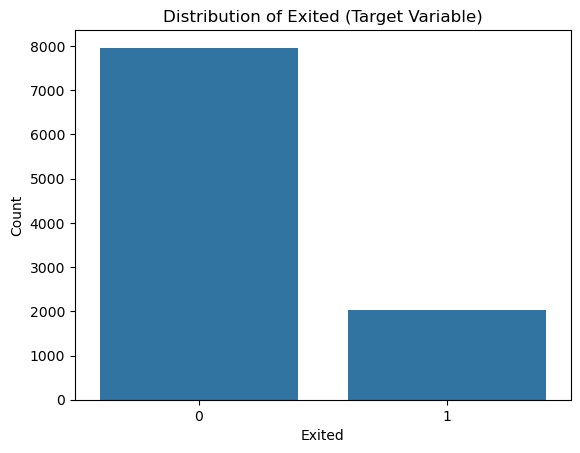

In [9]:
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited (Target Variable)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

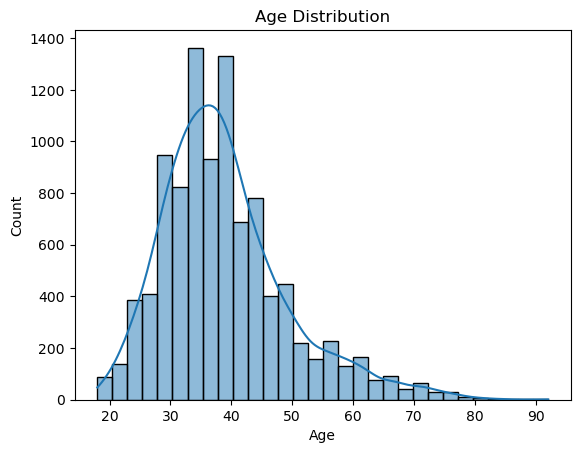

In [11]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

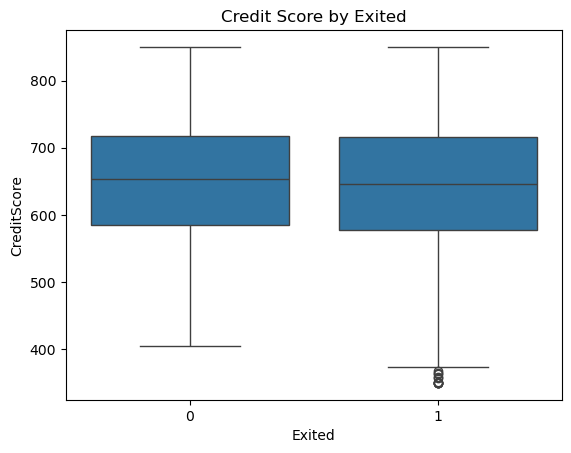

In [13]:
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score by Exited')
plt.show()

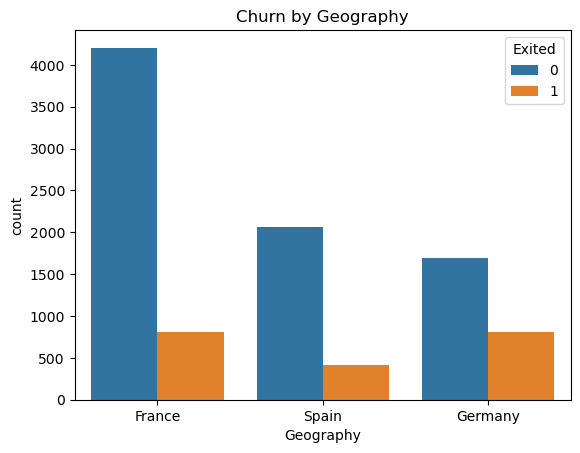

In [15]:
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

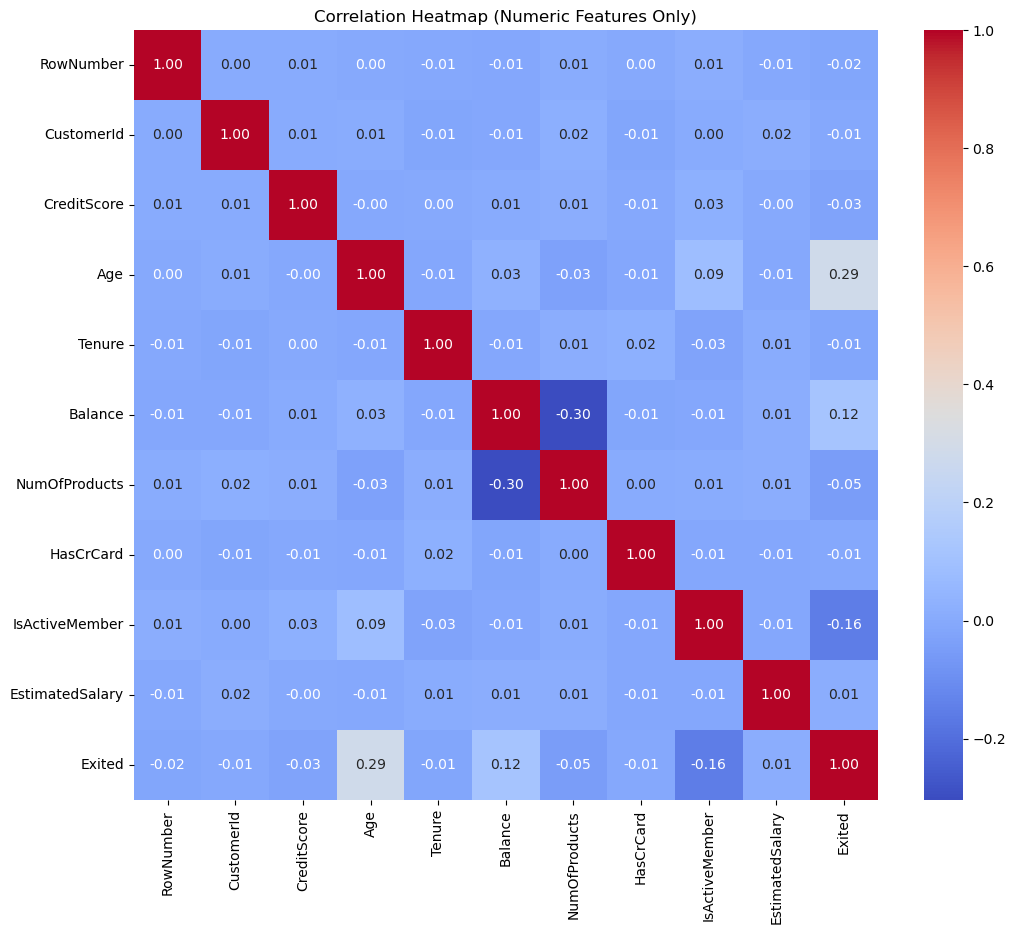

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [19]:
categorical_cols = ['Geography', 'Gender']
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619       0   42       2   
1          2    15647311      Hill          608       0   41       1   
2          3    15619304      Onio          502       0   42       8   
3          4    15701354      Boni          699       0   39       1   
4          5    15737888  Mitchell          850       0   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Geography_Germany  Geography_Spain  
0       1              False            False  
1       0           

In [21]:
scale_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore  Gender       Age    Tenure  \
0          1    15634602  Hargrave    -0.326221       0  0.293517 -1.041760   
1          2    15647311      Hill    -0.440036       0  0.198164 -1.387538   
2          3    15619304      Onio    -1.536794       0  0.293517  1.032908   
3          4    15701354      Boni     0.501521       0  0.007457 -1.387538   
4          5    15737888  Mitchell     2.063884       0  0.388871 -1.041760   

    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0 -1.225848              1          1               1         0.021886   
1  0.117350              1          0               1         0.216534   
2  1.333053              3          1               0         0.240687   
3 -1.225848              2          0               0        -0.108918   
4  0.785728              1          1               1        -0.365276   

   Exited  Geography_Germany  Geography_Spain  
0       1              False    

In [23]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
X = df.drop('Exited', axis=1)
y = df['Exited']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (8000, 11)
Testing set size: (2000, 11)


In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Logistic Regression ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Logistic Regression ROC AUC Score: 0.7790059710142174


In [29]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Random Forest ROC AUC Score: 0.857572072564211


In [31]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting ROC AUC Score:", roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Gradient Boosting ROC AUC Score: 0.8729263353236714


In [33]:
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print(f"{name} ROC AUC Score: {auc:.4f}")

Logistic Regression ROC AUC Score: 0.7790
Random Forest ROC AUC Score: 0.8576
Gradient Boosting ROC AUC Score: 0.8729


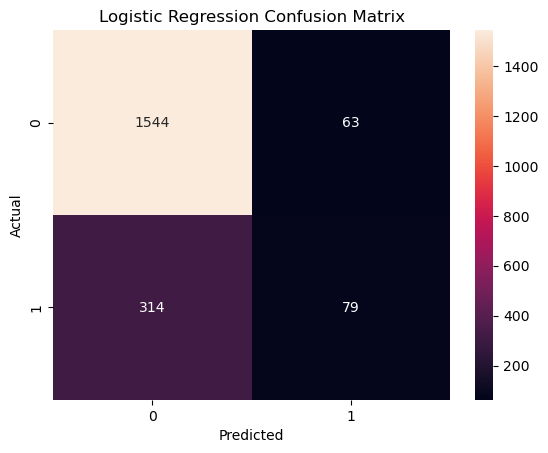

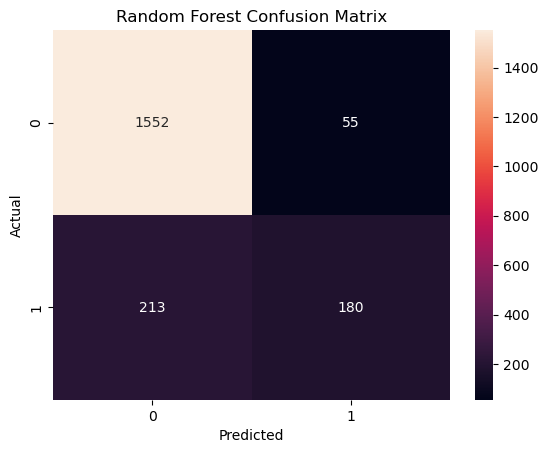

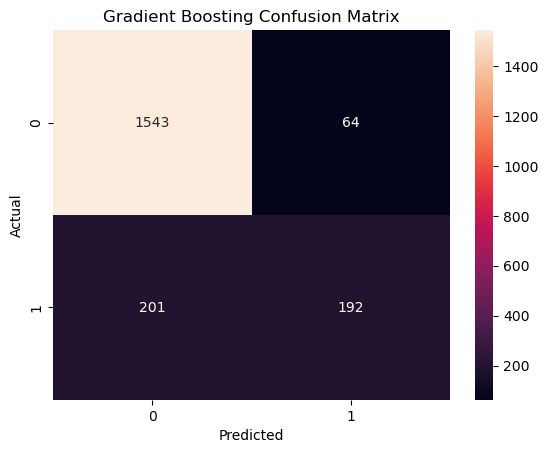

In [35]:

from sklearn.metrics import confusion_matrix

for name, model in models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

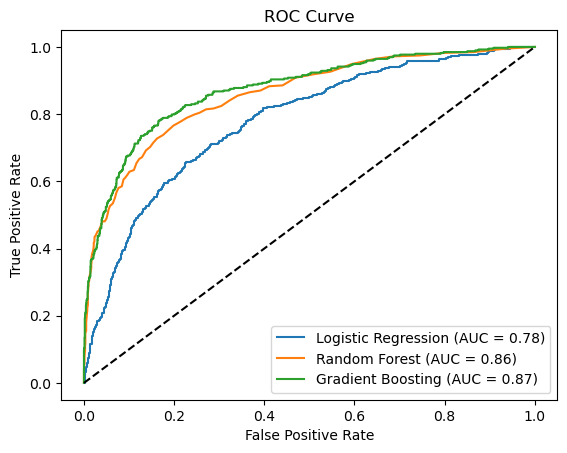

In [37]:

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [43]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                       cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best ROC AUC Score:", grid_rf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC AUC Score: 0.8621659495013038


In [45]:
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb,
                       cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_gb.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", grid_gb.best_params_)
print("Best ROC AUC Score:", grid_gb.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best ROC AUC Score: 0.8634945471986214


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Gradient Boosting ROC AUC Score: 0.8734


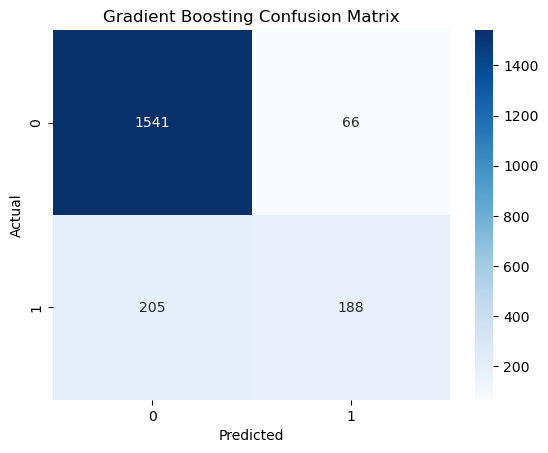

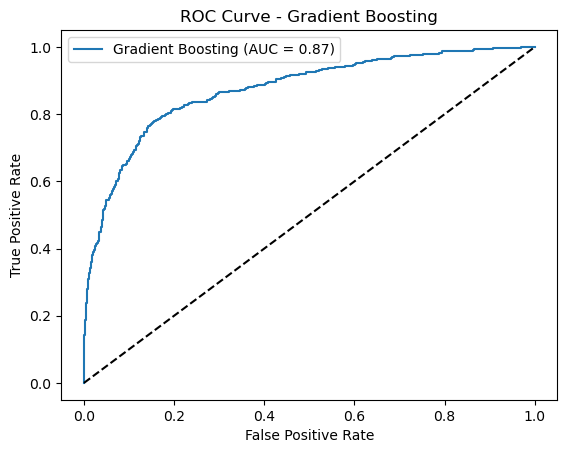

In [47]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
best_gb = grid_gb.best_estimator_
y_pred = best_gb.predict(X_test)
y_proba = best_gb.predict_proba(X_test)[:, 1]
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Gradient Boosting ROC AUC Score: {roc_auc:.4f}")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.show()

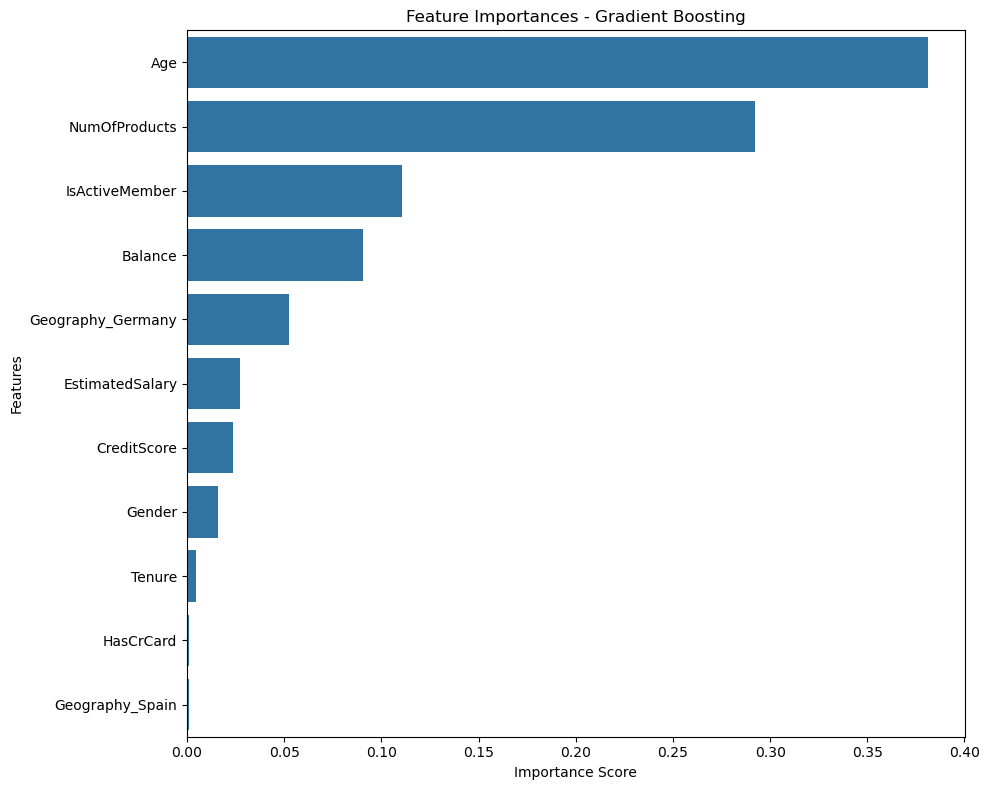

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = pd.Series(best_gb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances - Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [51]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


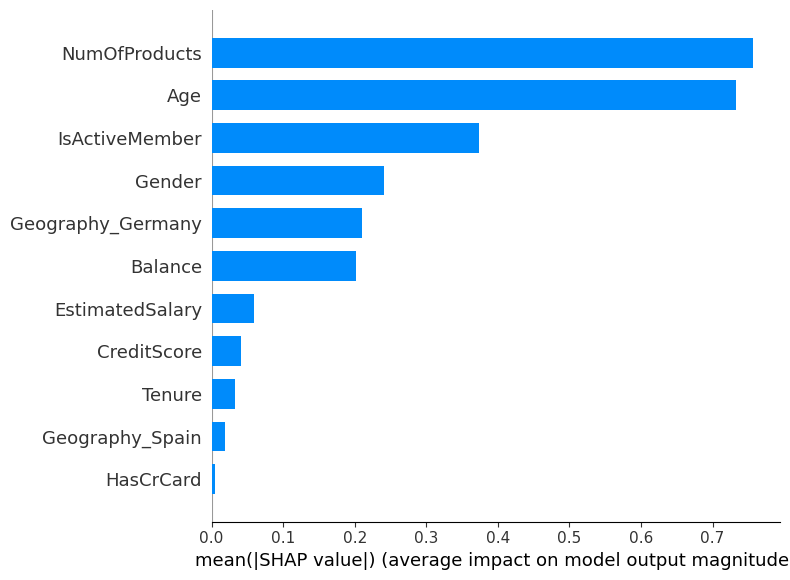

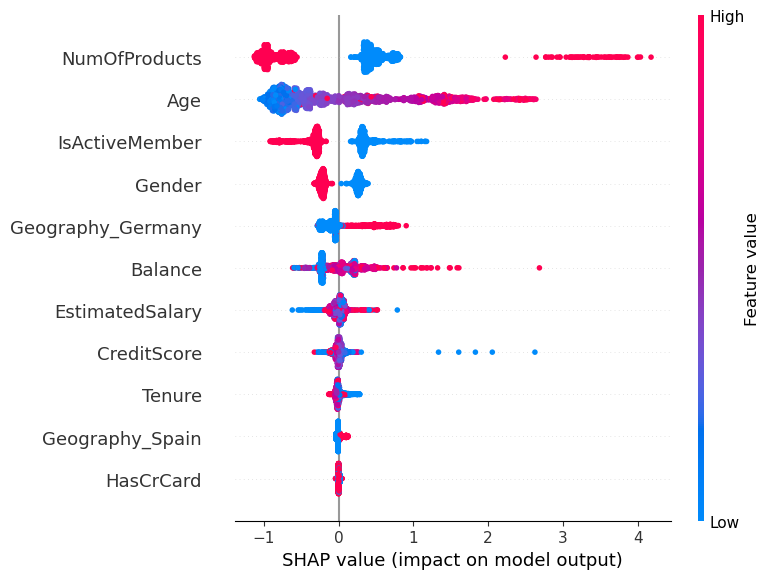

In [53]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(best_gb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

In [55]:
import sklearn
print(sklearn.__version__)

1.5.1


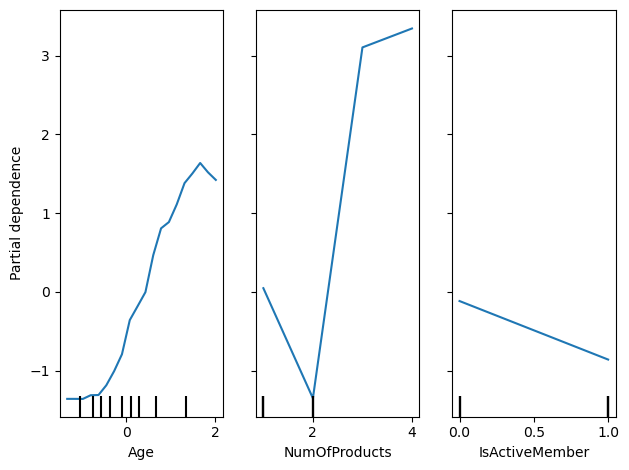

In [57]:

from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
top_features = feature_importances.index[:3]
PartialDependenceDisplay.from_estimator(
    best_gb,
    X_test,
    features=top_features,
    grid_resolution=20,
    kind='average'  # You can also specify 'individual' for individual PDPs
)
plt.tight_layout()
plt.show()

In [59]:
import joblib
joblib.dump(best_gb, 'gradient_boosting_churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, 'features.pkl')

['features.pkl']